/mnt/home/boddutha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


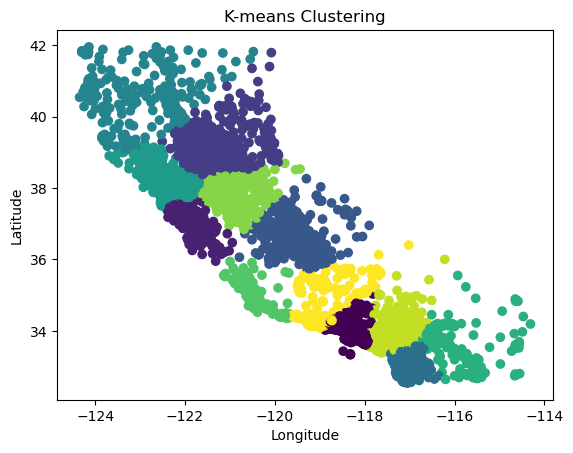

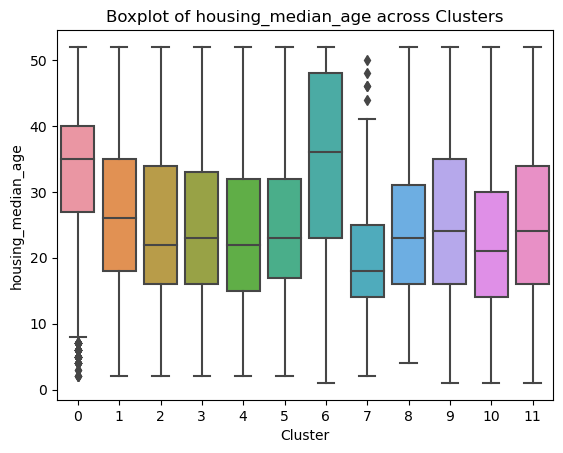

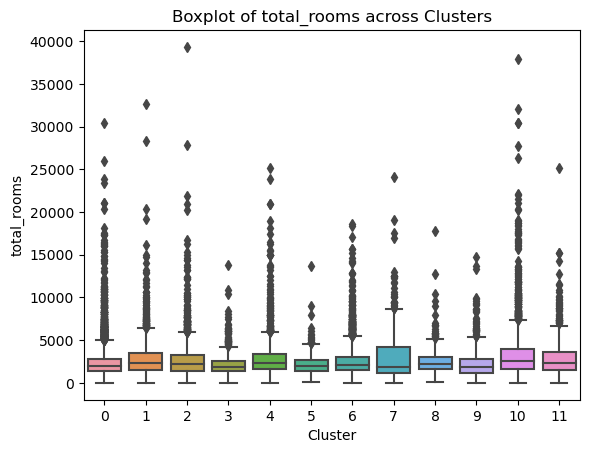

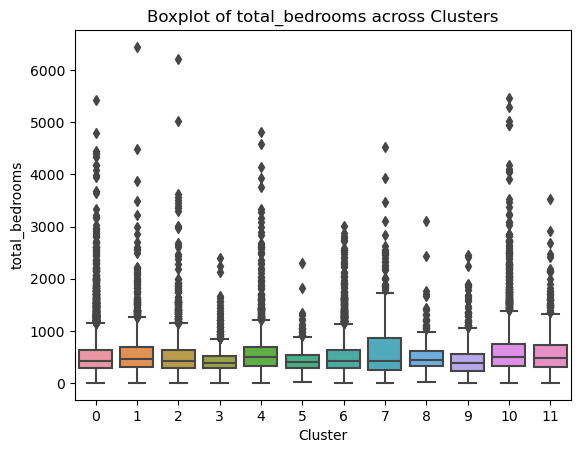

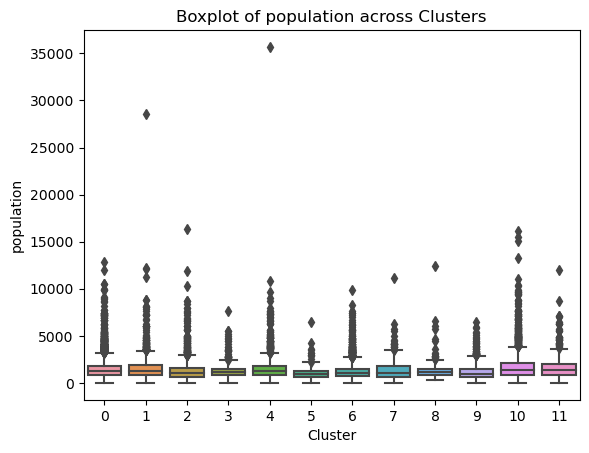

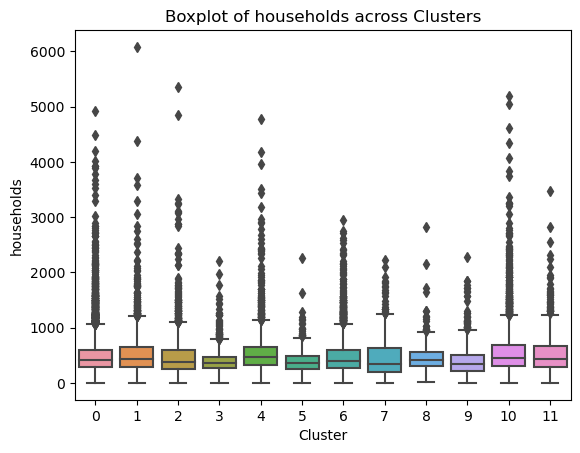

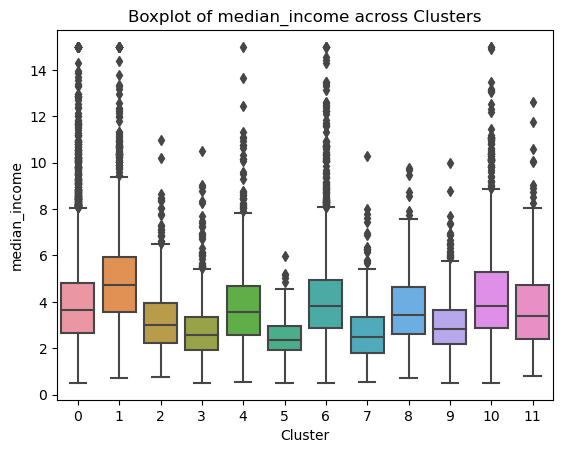

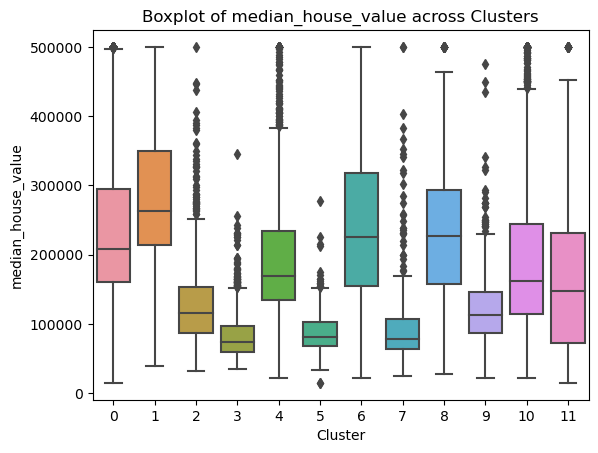

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
data = pd.read_csv('/mnt/research/NOS_mri/CSE801A_Spring2024_A3/CALIFORNIA-housing.csv')

# Select the longitude and latitude columns
coordinates = data[['longitude', 'latitude']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=12)
kmeans.fit(coordinates)

# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot
plt.scatter(data['longitude'], data['latitude'], c=labels)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.show()
# Group the data by cluster labels
data['cluster'] = labels
grouped_data = data.groupby('cluster')

# Create boxplots for each variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for variable in numerical_variables:
    plt.figure()
    sns.boxplot(x='cluster', y=variable, data=data)
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.title(f'Boxplot of {variable} across Clusters')

plt.show()


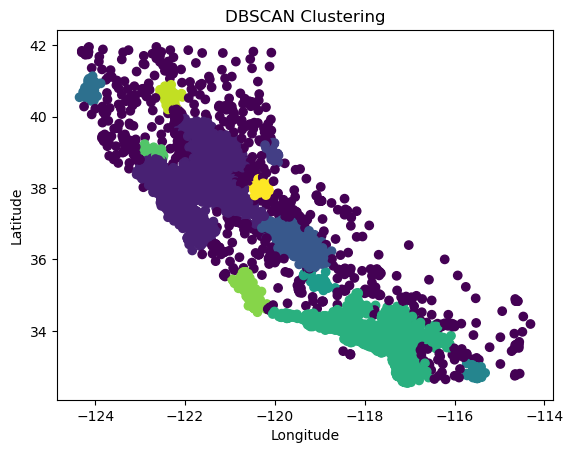

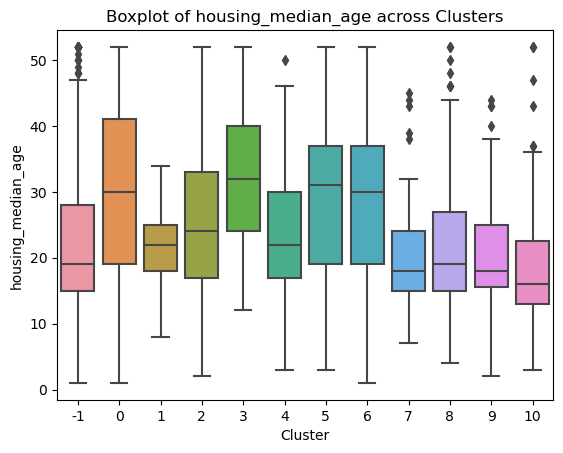

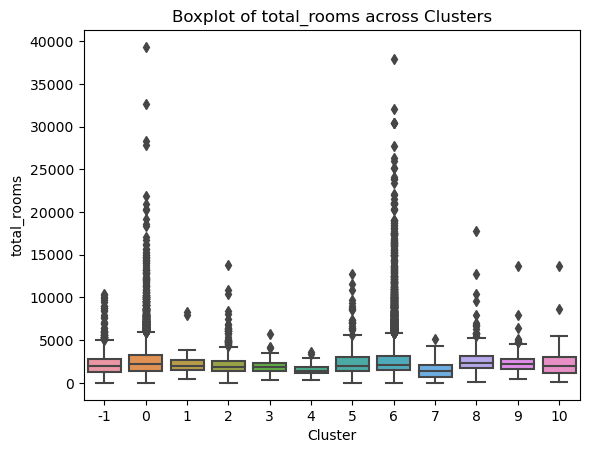

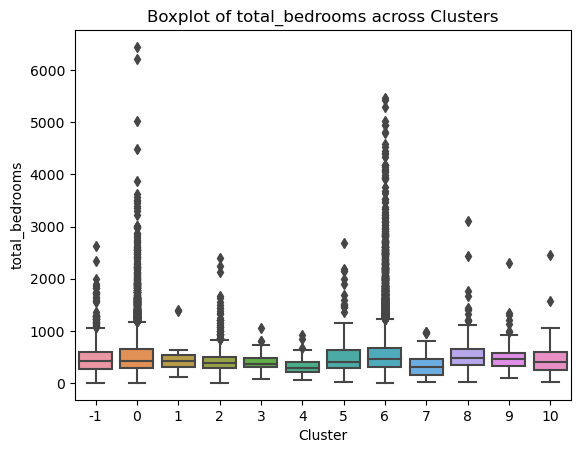

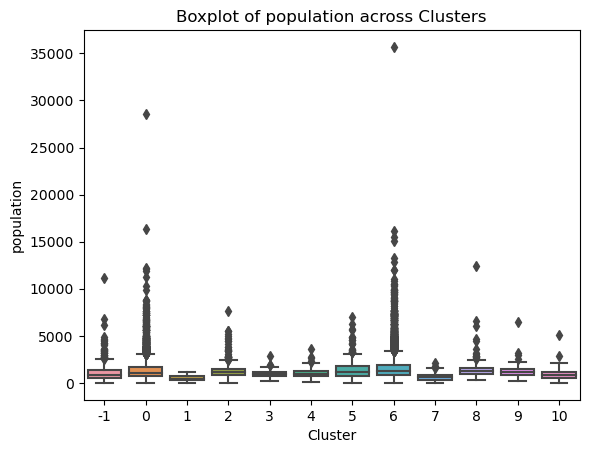

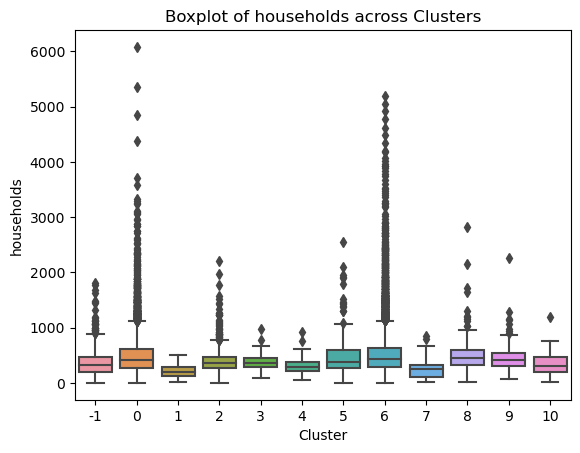

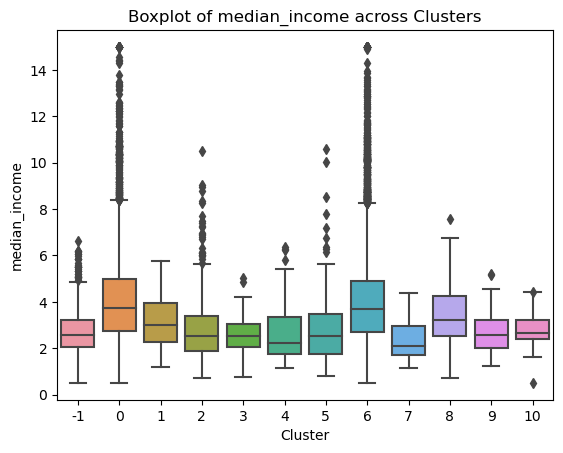

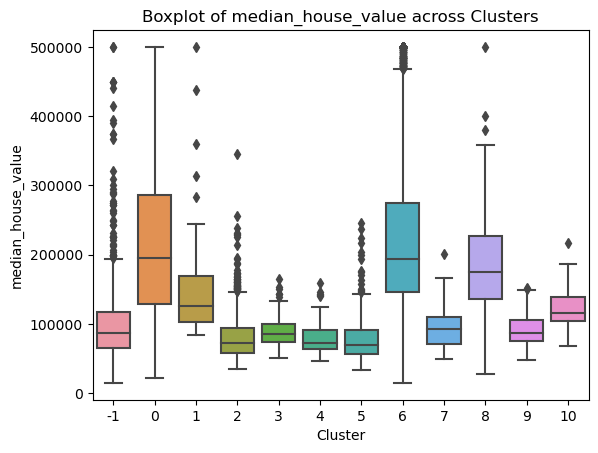

In [8]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=50)
dbscan.fit(coordinates)

# Get the cluster labels
labels = dbscan.labels_

# Create a scatter plot
plt.scatter(data['longitude'], data['latitude'], c=labels)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')
plt.show()

# Group the data by cluster labels
data['cluster'] = labels
grouped_data = data.groupby('cluster')

# Create boxplots for each variable
for variable in numerical_variables:
    plt.figure()
    sns.boxplot(x='cluster', y=variable, data=data)
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.title(f'Boxplot of {variable} across Clusters')

plt.show()


/mnt/home/boddutha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


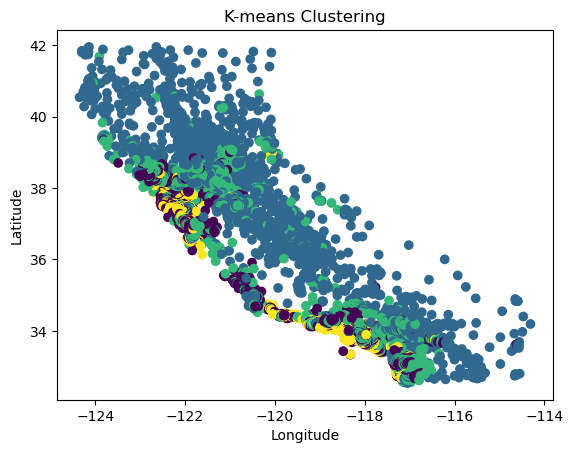

/mnt/home/boddutha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


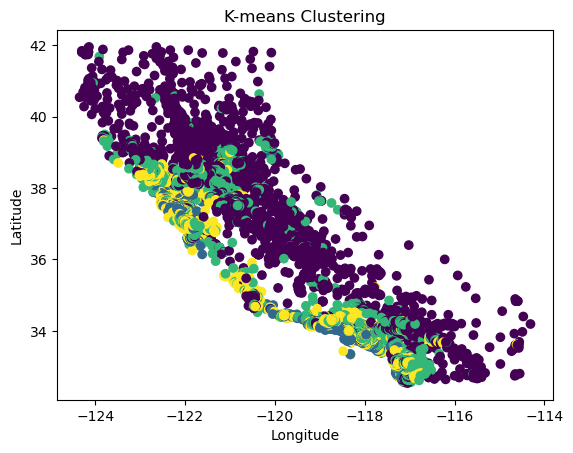

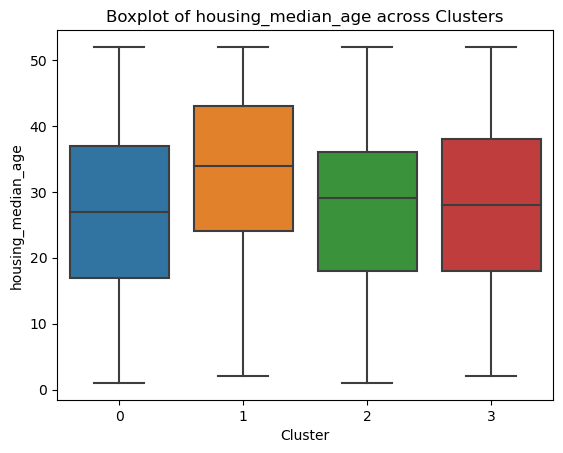

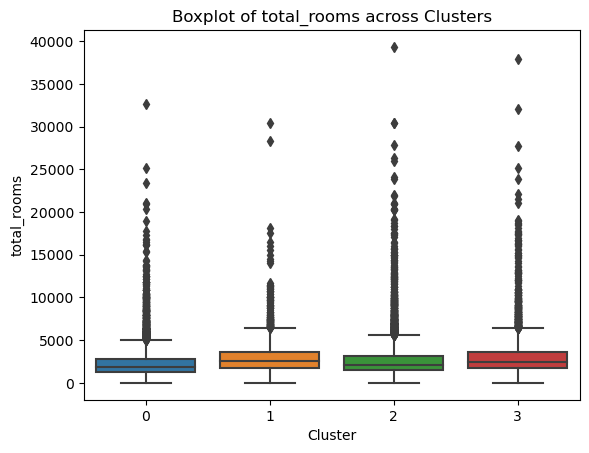

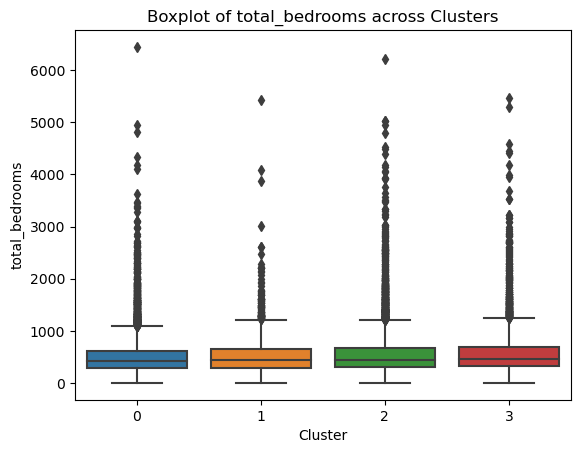

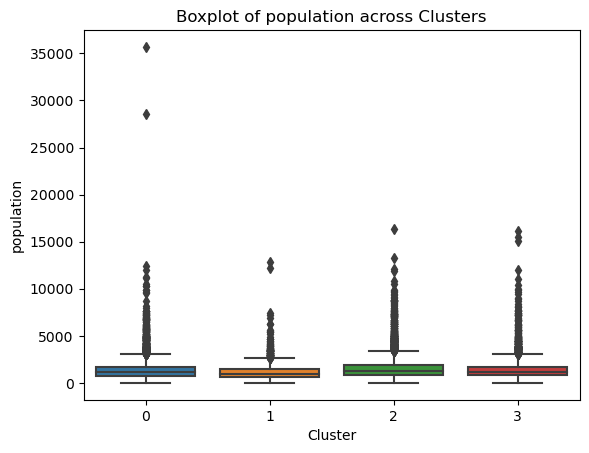

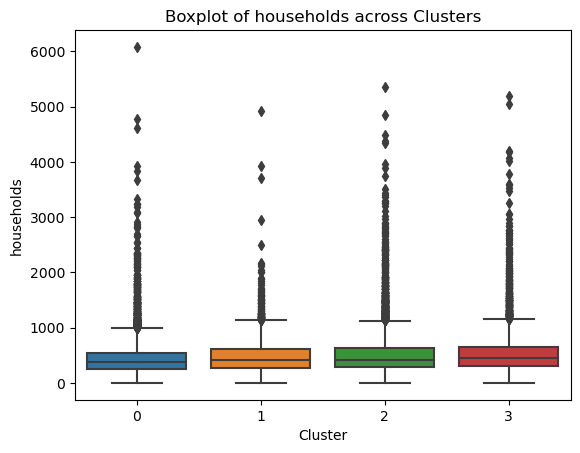

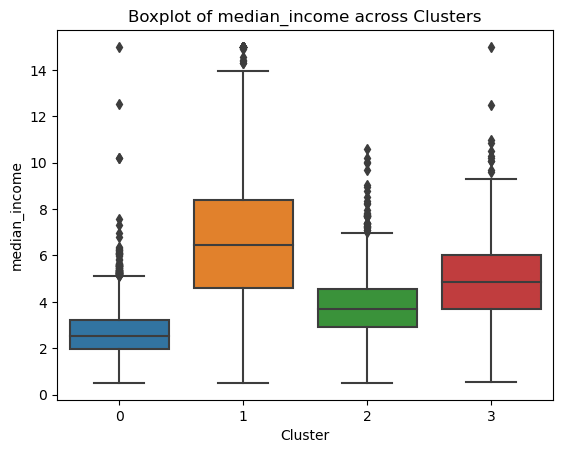

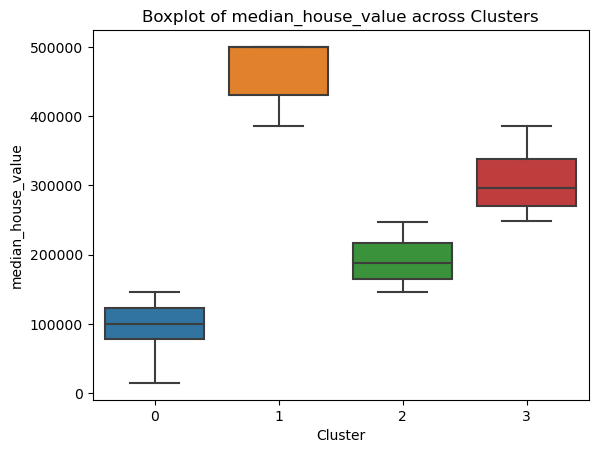

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['median_income', 'median_house_value']])

# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot
plt.scatter(data['longitude'], data['latitude'], c=labels)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.show()
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('/mnt/research/NOS_mri/CSE801A_Spring2024_A3/CALIFORNIA-housing.csv')

# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['median_income', 'median_house_value']])

# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot
plt.scatter(data['longitude'], data['latitude'], c=labels)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.show()

# Group the data by cluster labels
data['cluster'] = labels
grouped_data = data.groupby('cluster')

# Create boxplots for each variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for variable in numerical_variables:
    plt.figure()
    sns.boxplot(x='cluster', y=variable, data=data)
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.title(f'Boxplot of {variable} across Clusters')

plt.show()


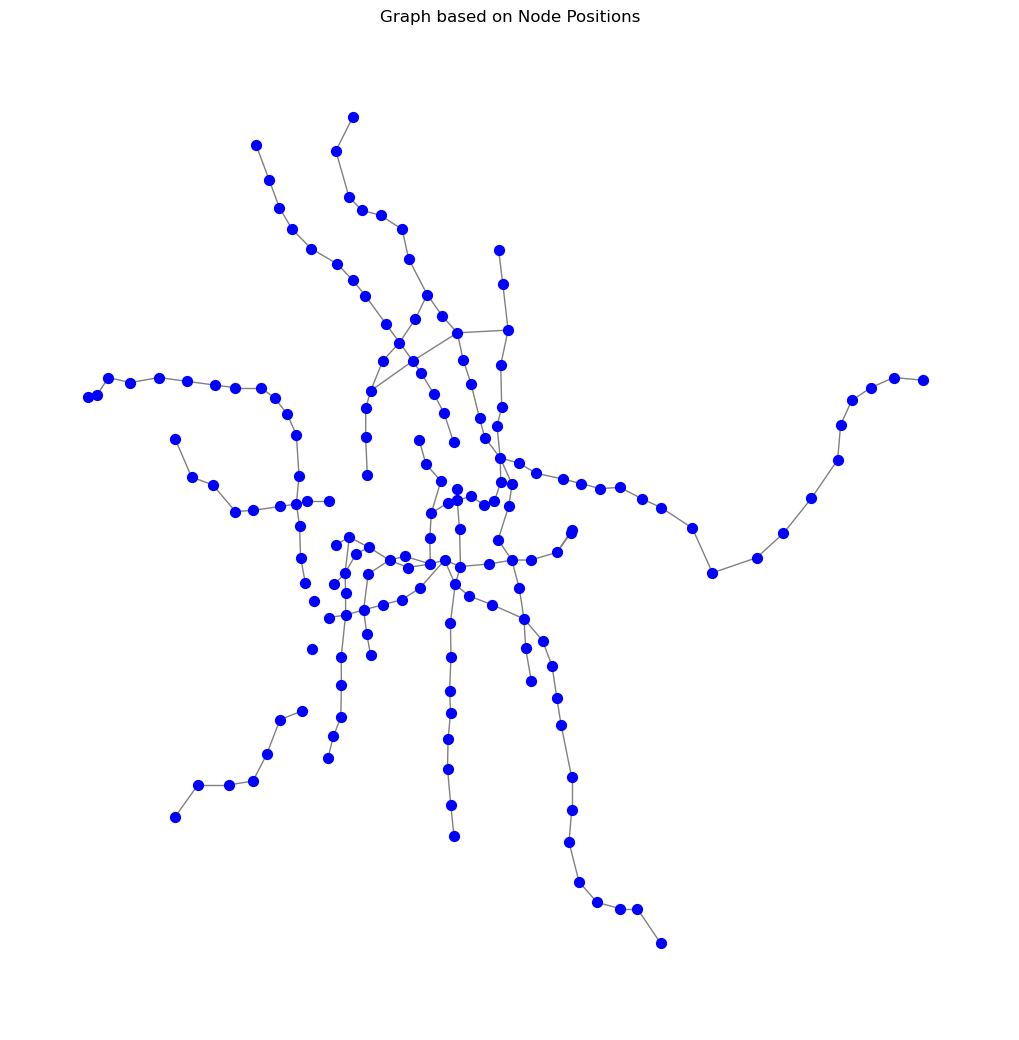

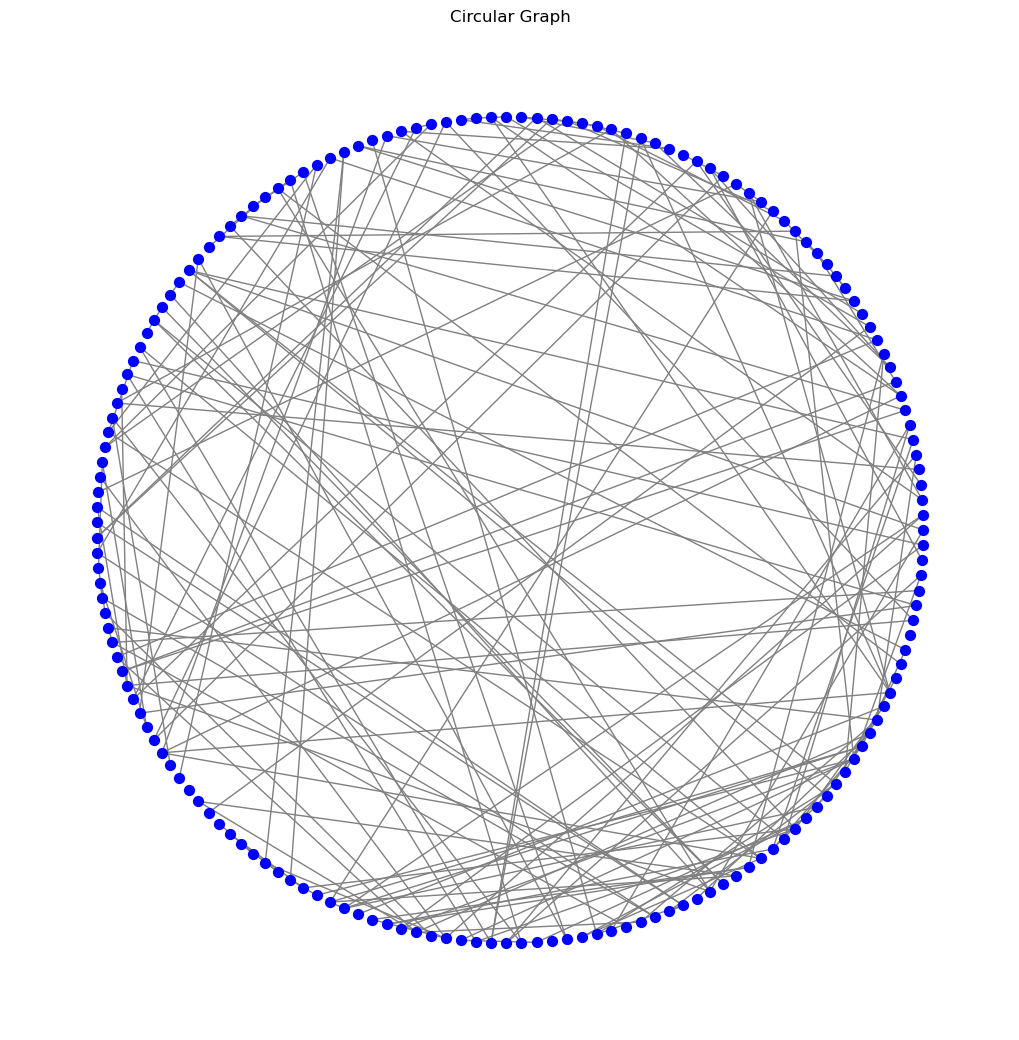

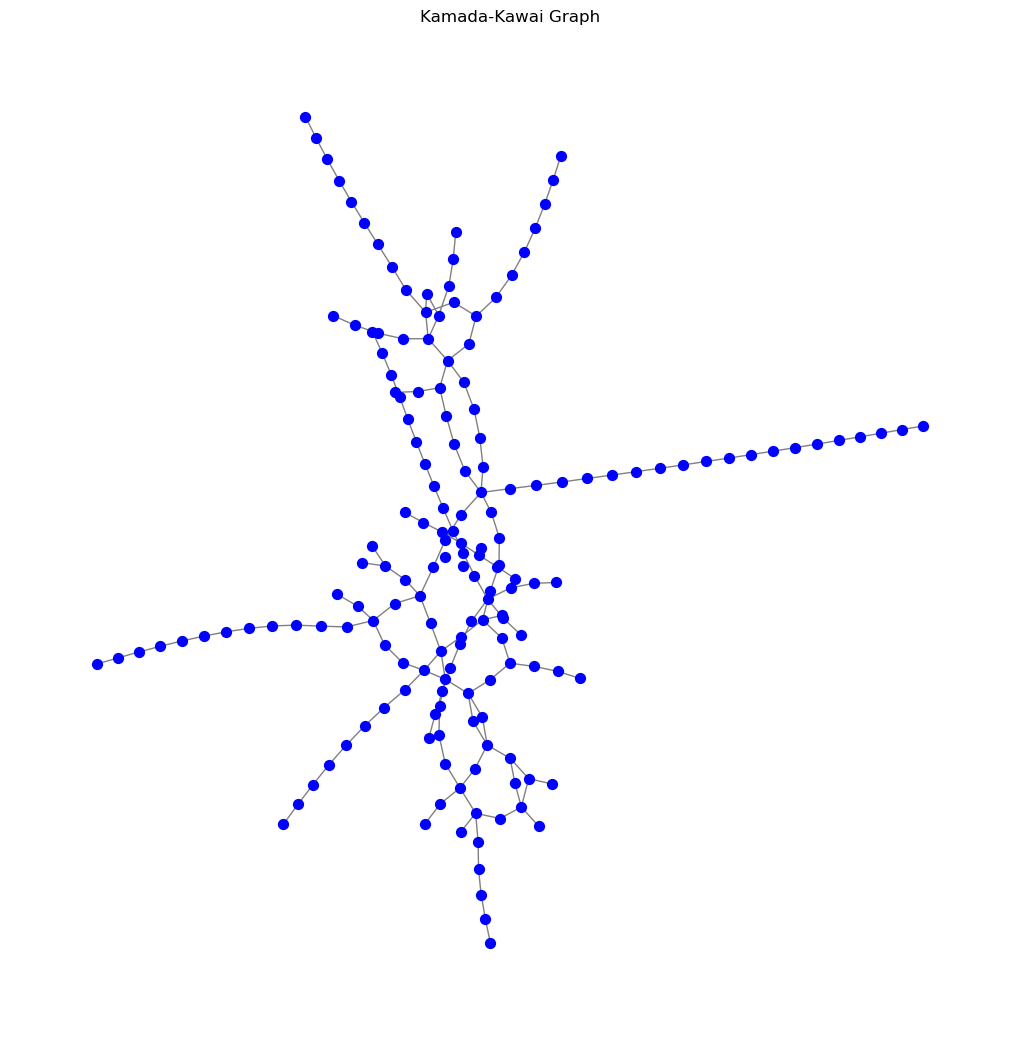

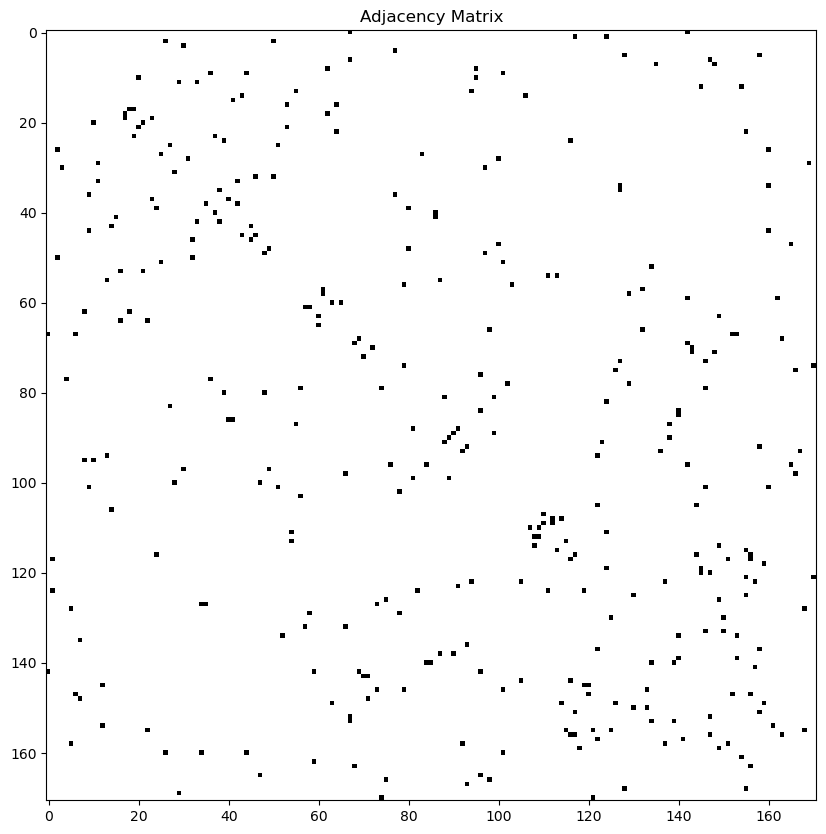

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the stations and connections data
stations_data = pd.read_csv('/mnt/research/NOS_mri/CSE801A_Spring2024_A3/BERLIN-stations.csv')
connections_data = pd.read_csv('/mnt/research/NOS_mri/CSE801A_Spring2024_A3/BERLIN-connections.csv')

# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
for index, station in stations_data.iterrows():
    graph.add_node(station['name'], pos=(station['longitude'], station['latitude']))

# Add edges to the graph
for index, row in connections_data.iterrows():
    if row['station'] in graph.nodes and row['adjacent'] in graph.nodes:
        graph.add_edge(row['station'], row['adjacent'])

# Plot the graph based on node positions
pos = nx.get_node_attributes(graph, 'pos')
plt.figure(figsize=(10, 10))
nx.draw(graph, pos, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
plt.title('Graph based on Node Positions')
plt.show()

# Plot the graph as a circular graph
plt.figure(figsize=(10, 10))
nx.draw_circular(graph, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
plt.title('Circular Graph')
plt.show()

# Plot the graph as a Kamada-Kawai graph
plt.figure(figsize=(10, 10))
nx.draw_kamada_kawai(graph, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
plt.title('Kamada-Kawai Graph')
plt.show()

# Plot the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(graph)
plt.figure(figsize=(10, 10))
plt.imshow(adj_matrix.toarray(), cmap='binary')
plt.title('Adjacency Matrix')
plt.show()


In [22]:
import networkx as nx

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
highest_degree_node = max(degree_centrality, key=degree_centrality.get)

# Calculate average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)

# Calculate transitivity
transitivity = nx.transitivity(G)

# Calculate graph density
graph_density = nx.density(G)

# Calculate number of modules and nodes in each module
modules = list(nx.connected_components(G))
num_modules = len(modules)
nodes_per_module = [len(module) for module in modules]

# Calculate average clustering coefficient and small worldness of modules with more than 50 nodes
large_modules = [module for module in modules if len(module) > 50]
average_clustering_coefficient_large_modules = [nx.average_clustering(G.subgraph(module)) for module in large_modules]
small_worldness_large_modules = [nx.smallworld.sigma(G.subgraph(module)) for module in large_modules]

# Print the results
print("Node with highest betweenness centrality:", highest_betweenness_node)
print("Node with highest degree centrality:", highest_degree_node)
print("Average clustering coefficient:", average_clustering_coefficient)
print("Transitivity score:", transitivity)
print("Graph density:", graph_density)
print("Number of modules:", num_modules)
print("Nodes per module:", nodes_per_module)
print("Average clustering coefficient of large modules:", average_clustering_coefficient_large_modules)
print("Small worldness of large modules:", small_worldness_large_modules)

NameError: name 'G' is not defined